In [2]:
import pandas as pd


In [31]:
import pandas as pd

columns = ['g1_x', 'g1_y', 'g1_z', 'g2_x', 'g2_y', 'g2_z', 'class']

goodPosture = pd.read_csv("../data/goodPosture.txt", names=columns)
badPosture = pd.read_csv("../data/badPosture.txt", names=columns)
goodSitting = pd.read_csv("../data/goodPosture.txt", names=columns)
badSitting = pd.read_csv("../data/badPosture.txt", names=columns)
good = pd.read_csv("../data/goodPosture.txt", names=columns)
bad = pd.read_csv("../data/badPosture.txt", names=columns)

postures = pd.concat([goodPosture, badPosture], axis=0, ignore_index=True)
sitting = pd.concat([goodSitting, badSitting], axis=0, ignore_index=True)
good_bad = pd.concat([good, bad], axis=0, ignore_index=True)

combined = pd.concat([postures, sitting], axis=0, ignore_index=True)

df = pd.concat([combined, good_bad], axis=0, ignore_index=True)

print(df)


            g1_x       g1_y      g1_z        g2_x       g2_y        g2_z  \
0      11.574894 -76.283462 -9.243393    0.000000   0.000000    0.000000   
1      11.375299 -76.146537 -9.108152 -174.153515 -80.120379  173.041179   
2      11.299645 -76.100832 -9.077328 -174.222900 -80.145151  173.056784   
3      11.341434 -76.174561 -9.139042 -174.330933 -80.058043  173.089882   
4      11.333670 -76.192645 -9.157010 -174.451337 -79.961864  173.135536   
...          ...        ...       ...         ...        ...         ...   
2713 -162.677458 -33.285396 -5.398960 -133.891124 -19.077627   -8.027567   
2714 -165.871117 -33.835551 -1.976419 -136.857300 -20.522495   -4.367570   
2715 -168.793899 -34.110361  0.329602 -141.048404 -21.763483   -0.983535   
2716 -171.509685 -33.506005  1.138439 -146.898033 -22.595478    0.964737   
2717 -176.266152 -32.777071 -0.150250 -154.190122 -22.762445    0.936438   

      class  
0      good  
1      good  
2      good  
3      good  
4      good  
...

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [34]:
X = df[['g1_x', 'g1_y', 'g1_z', 'g2_x', 'g2_y', 'g2_z']]

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(2174, 544, 2174, 544)

In [35]:
X_train[:5], y_train[:5]

(            g1_x       g1_y        g1_z        g2_x       g2_y        g2_z
 445  -168.124510  -8.577389   -5.125580 -170.589696   2.480119   -4.275480
 1325 -170.201565  -6.480027 -164.436520 -172.353471   8.179432 -171.666283
 767  -174.339707 -16.925727   26.561091 -169.340581  18.856433   23.253108
 1964 -163.183894 -65.865202  -46.972117 -172.362392 -52.000053  -36.313434
 1913    9.232230 -78.283024  127.416526  177.374795 -79.798136  -42.836520,
 445     1
 1325    1
 767     0
 1964    1
 1913    1
 Name: class, dtype: int64)

In [36]:
from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()

model_LogR = LogR.fit(X_train, y_train)

predictions = LogR.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print(f"Logistic Regression's Accuracy: {accuracy}")


Logistic Regression's Accuracy: 0.9632352941176471


In [38]:
for i in range(len(predictions)):
    print(f"Predicted: {label_encoder.inverse_transform([predictions[i]])[0]}, Actual: {label_encoder.inverse_transform([y_test.iloc[i]])[0]}")

Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  good, Actual:  good
Predicted:  bad, Actual:  bad
Predicted:  bad, Actual:  bad
Predicted

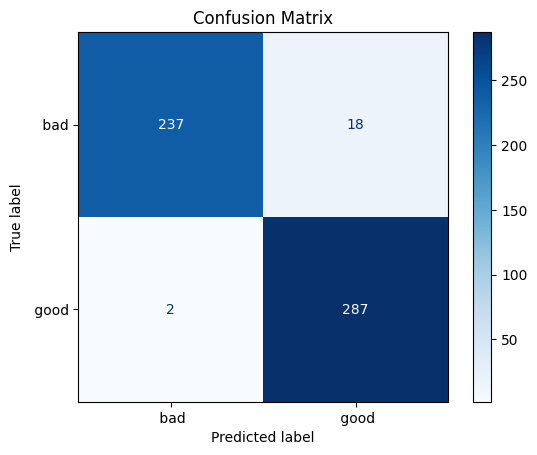

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [40]:
import joblib

joblib.dump(model_LogR, 'model.pkl')

['model.pkl']

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
predictions = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 1.0


In [43]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model = xgb_model.fit(X_train, y_train)

In [44]:
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 1.0


In [46]:
joblib.dump(xgb_model, 'model.pkl')

['model.pkl']